In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# **Data Ingestion**

In [2]:
PATH='worldwide covid data.csv'

covid_data=pd.read_csv(PATH)

print("Shape of Dataset : ",covid_data.shape,'\n\n')

print("**************************************************************")

covid_data.head()

Shape of Dataset :  (196, 10) 


**************************************************************


,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases/1M population,Deaths/1M population,Total Tests,Tests/1M population,Population
0,Afghanistan,156397,7290,128982.0,20125.0,3899,182,777578.0,19384.0,40114009
1,Albania,190125,2970,178998.0,8157.0,66164,1034,1334004.0,464238.0,2873536
2,Algeria,207385,5954,142332.0,59099.0,4616,133,230861.0,5139.0,44922583
3,Andorra,15717,130,15392.0,195.0,202975,1679,193595.0,2500161.0,77433
4,Angola,64762,1723,61092.0,1947.0,1891,50,1140341.0,33297.0,34247275


**This dataset contains the COVID-19 Data of various countries in the world. <br><br>Below is the explanation of every column in the dataset.**<br><br>

1. Country - The Country of Origin.
2. Total Cases - The total COVID cases pertaining to that particular country.
3. Total Deaths - The total deaths due to COVID pertaining to that particular country.
4. Total Recovered - The total patients recovered from COVID pertaining to that particular country.
5. Active Cases - The total active patients of COVID pertaining to that particular country.
6. Total Cases/1M population - The total Cases per Million of Population pertaining to that country.
7. Deaths/1M population - The total deaths per Million of Population pertaining to that country.
8. Total Tests - The total COVID testing done of the Population pertaining to that country.
9. Tests/1M population - The total COVID testing done per Million of the Population pertaining to     that country.
10. Population - The total population pertaining to that country.
<br><br>

**Now let's come to the research questions we aim to answer using this dataset.**

# **Research Questions**

1. Which Country has the highest and Lowest number of active cases ?
2. Which country must, may and avoid imposing lockdowns ?
3. What is the Death / Population % of a country ?
4. What is the Rate of Recovery of the particular country ?
5. Is there a positive relation between the population tested and recovered ?
6. Which country(s) will take the longest time to recover from COVID-19 ?
7. Is the rate of testing faster or slower with respect to the population of the country ?

<br><br>
We can answer many more questions using this dataset but lets continue with these main 7 questions by deep diving into the dataset and finding out insights !!

# **Pre-Processing Of Data**

1. Handling Nulls
2. Finding out negative values and capping them to 0 (since none of the columns can have -ve values)
3. Removing Duplicates ( if any )
4. Describe Data
5. Corr Matrix

In [3]:
print("Columns having NULLS\n\n*******************************")
covid_data.isna().sum()

Columns having NULLS

*******************************


Country                      0
Total Cases                  0
Total Deaths                 0
Total Recovered              2
Active Cases                 2
Total Cases/1M population    0
Deaths/1M population         0
Total Tests                  4
Tests/1M population          4
Population                   0
dtype: int64

#### Total Recovered, Total Tests, Tests/1M population and Active Cases Column has NULLS.

In [4]:
covid_data[(covid_data['Total Tests'].isna())|(covid_data['Tests/1M population'].isna())
           |(covid_data['Total Recovered'].isna())|(covid_data['Active Cases'].isna())]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases/1M population,Deaths/1M population,Total Tests,Tests/1M population,Population
40,Comoros,4332,147,4115.0,70.0,4842,164,NaN,NaN,894657
130,Nicaragua,16699,207,4225.0,12267.0,2481,31,NaN,NaN,6731295
141,Peru,2207890,200469,NaN,NaN,65723,5967,19364380.0,576428.0,33593734
176,Tajikistan,17086,124,16960.0,2.0,1739,13,NaN,NaN,9827362
177,Tanzania,26196,725,NaN,NaN,422,12,NaN,NaN,62033339


In [5]:
covid_data.fillna(0,inplace=True)

In [6]:
covid_data.isna().sum()

Country                      0
Total Cases                  0
Total Deaths                 0
Total Recovered              0
Active Cases                 0
Total Cases/1M population    0
Deaths/1M population         0
Total Tests                  0
Tests/1M population          0
Population                   0
dtype: int64

In [7]:
# Finding Negative Values and Capping To 0.
for col in covid_data.columns:
    if(col=='Country'):
        continue
    for j in range(len(covid_data)):
        if(covid_data[col][j]<0):
            covid_data[col][j]=0
    

<ipython-input-7-06d4daa1194b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data[col][j]=0


In [8]:
# Dropping Duplicates
print("Before Dropping Duplicates : ",covid_data.shape,'\n')
covid_data=covid_data.drop_duplicates()
print("\nAfter Dropping Duplicates : ",covid_data.shape)

Before Dropping Duplicates :  (196, 10) 


After Dropping Duplicates :  (196, 10)


### There are no Duplicates in the data. Thats amazing !!!

In [9]:
# Describing the Dataset

desc=covid_data.describe()
desc.transpose()

,count,mean,std,min,25%,50%,75%,max
Total Cases,196.0,1.283176e+06,4.633190e+06,2623.0,22655.75,182403.0,664171.50,4.753654e+07
Total Deaths,196.0,2.591334e+04,8.557156e+04,3.0,334.75,2435.5,11974.50,7.783160e+05
Total Recovered,196.0,1.152993e+06,4.067061e+06,0.0,15473.00,135461.0,600682.50,3.760454e+07
Active Cases,196.0,9.390794e+04,6.669934e+05,0.0,773.50,6516.5,33615.50,9.153680e+06
Total Cases/1M population,196.0,5.705872e+04,5.296699e+04,68.0,6352.25,47229.5,95085.00,2.383560e+05
Deaths/1M population,196.0,9.275459e+02,9.702354e+02,3.0,114.50,628.0,1587.25,5.967000e+03
Total Tests,196.0,2.084643e+07,7.549034e+07,0.0,320461.25,1910720.5,10847622.50,7.144440e+08
Tests/1M population,196.0,1.078166e+06,1.926248e+06,0.0,94238.25,450706.5,1289491.00,1.502813e+07
Population,196.0,4.009353e+07,1.482287e+08,34028.0,1987648.00,8908211.0,28951498.50,1.439324e+09


In [10]:
covid_data['Active Cases / Population']=[round(covid_data['Active Cases'][i]/covid_data['Population'][i],4) for i in range(len(covid_data))]

# **Question 1**

In [11]:
# Getting Max and Min Active Cases

active_cases_data=covid_data.set_index('Country')['Active Cases / Population'].to_dict()

max_active_case_country=max(active_cases_data, key=active_cases_data.get)
min_active_case_country=min(active_cases_data, key=active_cases_data.get)

print('Country with Maximum Active Cases / Population : ',max_active_case_country,' ({} cases)'.format(list(covid_data[covid_data['Country']==max_active_case_country]['Active Cases'])[0]))
print('Country with Minimum Active Cases / Population : ',min_active_case_country,' ({} cases)'.format(list(covid_data[covid_data['Country']==min_active_case_country]['Active Cases'])[0]))


Country with Maximum Active Cases / Population :  Guadeloupe  (51743.0 cases)
Country with Minimum Active Cases / Population :  Bangladesh  (8140.0 cases)


# **Question 2**

In [12]:
# Considering Lockdown is imposed when Active Cases/Population >0.1

print("Countries that should LOCKDOWN :\n")
print(list(covid_data[covid_data['Active Cases / Population']>0.1]['Country']))

print("\nCountries that may LOCKDOWN :\n")
print(list(covid_data[(covid_data['Active Cases / Population']>=0.001)&(covid_data['Active Cases / Population']<=0.1)]['Country']))

print("\nCountries that can avoid LOCKDOWN :\n")
print(list(covid_data[covid_data['Active Cases / Population']<0.001]['Country']))

Countries that should LOCKDOWN :

['French Guiana', 'Guadeloupe', 'Martinique']

Countries that may LOCKDOWN :

['Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda', 'Armenia', 'Aruba', 'Austria', 'Azerbaijan', 'Bahamas', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brunei', 'Bulgaria', 'Burundi', 'Channel Islands', 'Chile', 'Congo', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominica', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Georgia', 'Germany', 'Greece', 'Guyana', 'Honduras', 'Hungary', 'Iceland', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Mayotte', 'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Netherlands', 'New Caledonia', 'Nicaragua', 'North Macedonia', 'Norway', 'Poland', 'Portug

# **Question 3**

In [13]:
# Death / Population
covid_data['Total Deaths / Population']=[round(covid_data['Total Deaths'][i]/covid_data['Population'][i],4) for i in range(len(covid_data))]
data=covid_data[['Country','Total Deaths / Population']].set_index('Country')
data

,Total Deaths / Population
Country,
Afghanistan,0.0002
Albania,0.0010
Algeria,0.0001
Andorra,0.0017
Angola,0.0001
...,...
Venezuela,0.0002
Vietnam,0.0002
Yemen,0.0001


# **Question 4**

In [14]:
# Q4 Rate of Recovery

covid_data['Recovery Rate']=[round((100*covid_data['Total Recovered'][i])/covid_data['Total Cases'][i],4) for i in range(len(covid_data))]
covid_data[['Country','Recovery Rate']]

,Country,Recovery Rate
0,Afghanistan,82.4709
1,Albania,94.1475
2,Algeria,68.6318
3,Andorra,97.9322
4,Angola,94.3331
...,...,...
191,Venezuela,96.5110
192,Vietnam,85.5804
193,Yemen,66.4341
194,Zambia,98.1769


# **Question 5**

Correlation is  0.8950424560312349

************************************************************************************




<AxesSubplot:>

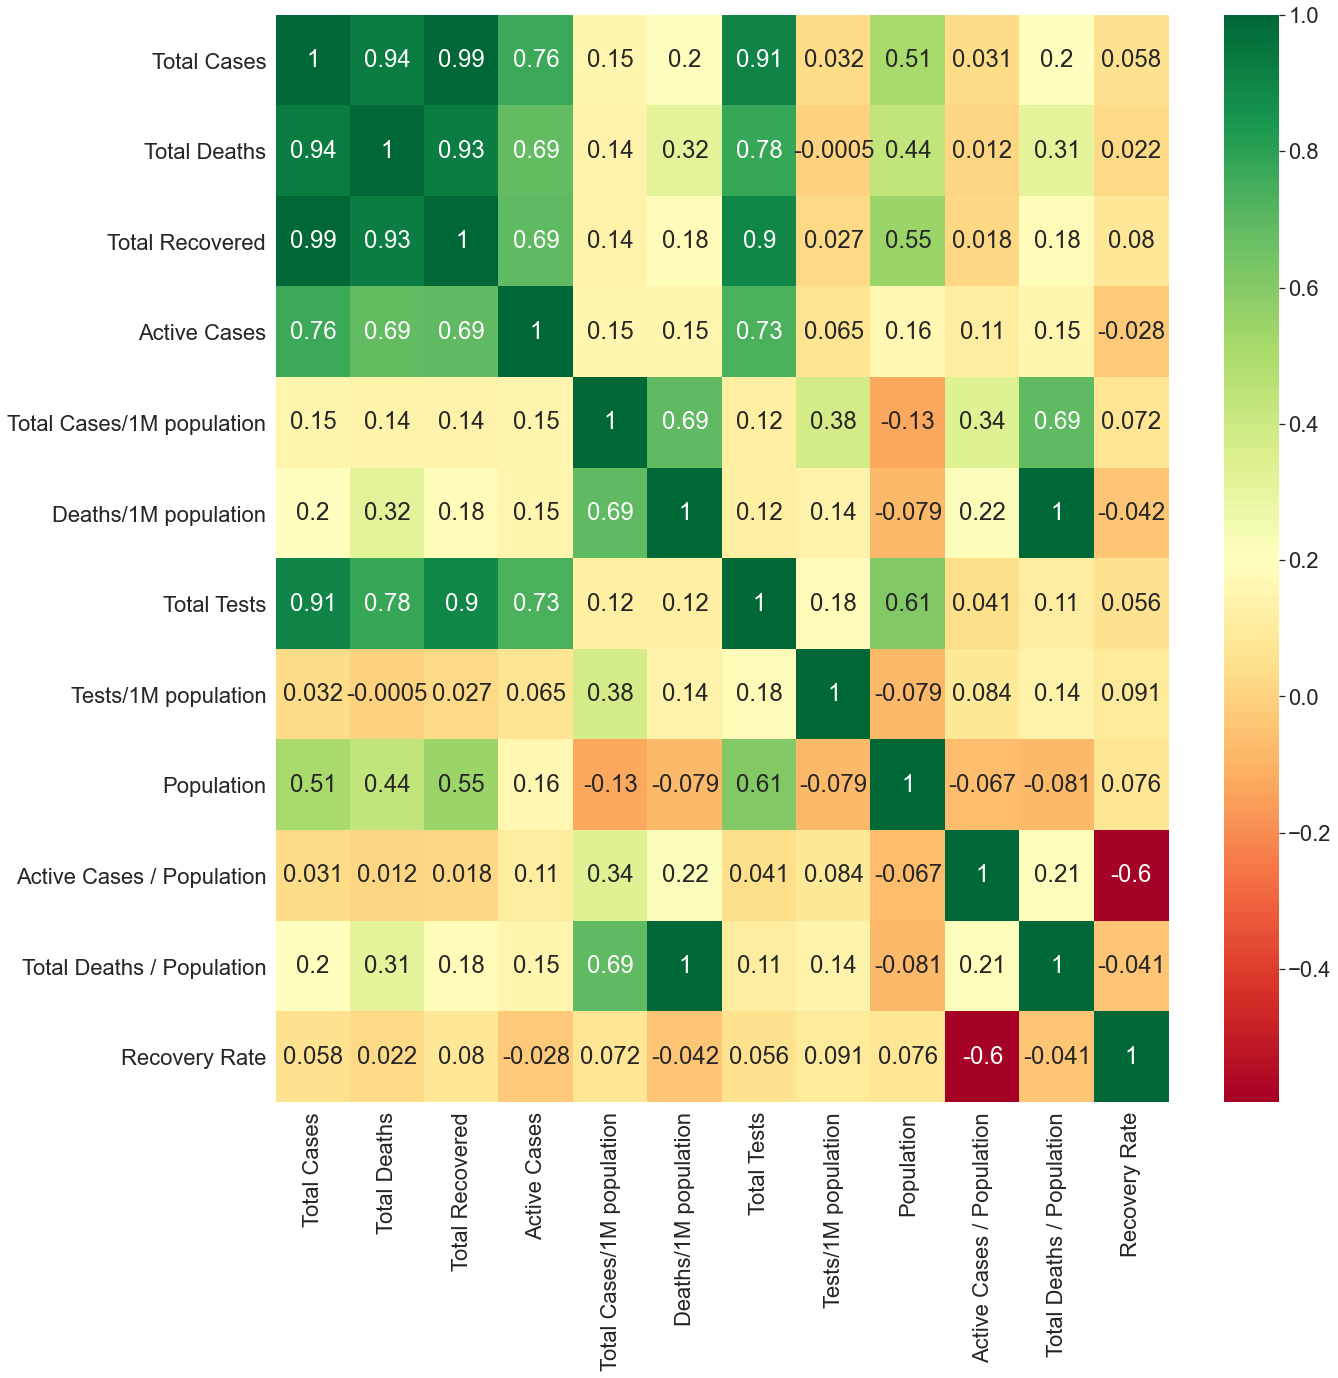

In [15]:
covid_data_new=covid_data.drop(columns='Country')
print('Correlation is ',covid_data_new.corr()['Total Tests']['Total Recovered'])
print('\n************************************************************************************\n\n')
plt.figure(figsize = (20,20))
sns.set(font_scale=2)
sns.heatmap(covid_data_new.corr(),cmap="RdYlGn",annot=True)


# **Question 6**

In [16]:
# Q6 Longest time to recover

print(list(covid_data[covid_data['Recovery Rate']<50]['Country']))

['Burundi', 'Finland', 'French Guiana', 'Guadeloupe', 'Honduras', 'Laos', 'Martinique', 'Mauritius', 'Mayotte', 'New Caledonia', 'Nicaragua', 'Norway', 'Peru', 'Rwanda', 'Saint Martin', 'Somalia', 'Tanzania']


# **Question 7**

In [17]:
# Q7 Rate of Testing faster or slower - Compare the mean of Testing/1M Population with individual datapoint.

covid_data['Testing Rate']=pd.Series()
mean_test_per_population=round(np.mean(np.asarray(covid_data['Tests/1M population'])),4)

for i in range(len(covid_data)):
    if(covid_data['Tests/1M population'][i]>mean_test_per_population):
        covid_data['Testing Rate'][i]='Faster'
    elif(covid_data['Tests/1M population'][i]<mean_test_per_population):
        covid_data['Testing Rate'][i]='Slower'
    else:
        covid_data['Testing Rate'][i]='At Par'

print("Countries with Faster Testing Rate than Average of Tests/1M population :\n\n",
      list(covid_data[covid_data['Testing Rate']=='Faster']['Country']))
print("\nCountries with Slower Testing Rate than Average of Tests/1M population :\n\n",
      list(covid_data[covid_data['Testing Rate']=='Slower']['Country']))
print("\nCountries with At Par Testing Rate than Average of Tests/1M population :\n\n",
      list(covid_data[covid_data['Testing Rate']=='At Par']['Country']))


Countries with Faster Testing Rate than Average of Tests/1M population :

 ['Andorra', 'Aruba', 'Australia', 'Austria', 'Bahrain', 'Barbados', 'Belgium', 'Bermuda', 'Bhutan', 'Brunei', 'Canada', 'Channel Islands', 'Chile', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark', 'Dominica', 'Estonia', 'Finland', 'France', 'French Guiana', 'Georgia', 'Greece', 'Guadeloupe', 'Hong Kong', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jordan', 'Kuwait', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Monaco', 'Mongolia', 'Montenegro', 'Norway', 'Oman', 'Portugal', 'Réunion', 'Russia', 'Saint Martin', 'San Marino', 'Singapore', 'Sint Maarten', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'UAE', 'UK', 'Uruguay', 'USA']

Countries with Slower Testing Rate than Average of Tests/1M population :

 ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bolivia', 'Bosnia and Herze

<ipython-input-17-b902e366580b>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  covid_data['Testing Rate']=pd.Series()
<ipython-input-17-b902e366580b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['Testing Rate'][i]='Slower'
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-17-b902e366580b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

# **End of Notebook**